<a href="https://colab.research.google.com/github/mzjuin/anomaly/blob/master/feature_extract_image_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# reference : https://www.youtube.com/watch?v=LGk2SfHLhGo
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

import tensorflow as tf

from matplotlib import pyplot as plt

In [2]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

print(model.summary())

553467096/553467096 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [47]:
features = {}

image_path = "/content/drive/MyDrive/cat/cat.png"
image = load_img(image_path, target_size=(224,224))
# convert pixel to numpy array
image = img_to_array(image)
# reshape to suit model 
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

print(f"Reshaped : {image.shape}")
# preprocess image
image = preprocess_input(image)

# extract features
feature = model.predict(image)
features["donation"] = feature

Reshaped : (1, 224, 224, 3)
1/1 [==============================] - 1s 569ms/step


# Visulize feature

In [59]:
model = VGG16()
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [64]:
model.layers[7].output.shape[3]

256

In [78]:
print(tf.math.sqrt(tf.cast(128, tf.float32)).numpy())
int(tf.math.sqrt(tf.cast(128, tf.float32)).numpy())

11.313708


11

map_size : 64


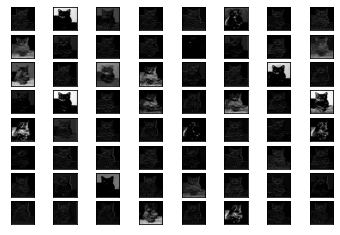

In [86]:
no_layer = 1
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[no_layer].output)
# model.summary()
# load the image with the required shape
img = load_img(image_path, target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = tf.expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img, verbose=0)
# plot all 64 maps in an 8x8 squares
map_size = model.layers[no_layer].output.shape[3]
square = int(tf.math.sqrt(tf.cast(map_size, tf.float32)).numpy())
print(f"map_size : {map_size}")
ix = 1

for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

# Pytorch feature extract

In [79]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image